# Data Analysis for discretized examples

## Accuracy vs. discretization amount

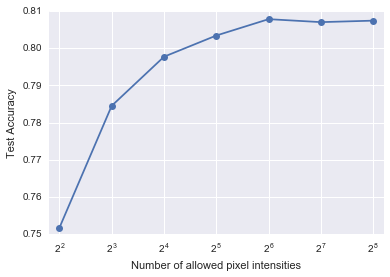

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

num_allowed = np.array((4,8,16,32,64,128,256))
accuracy = np.array((0.7517,0.7845,0.7977,0.8034,0.8078,0.807,0.8074))

width = 4
height = 3
fig, ax = sns.plt.subplots()
sns.plt.plot(num_allowed,accuracy,'o-')
sns.plt.xlabel("Number of allowed pixel intensities")
plt.xlim((3.48,294))
ax.set_xscale('log', basex=2)
sns.plt.ylabel("Test Accuracy")
#plt.legend(["Raw", "GrayScale", "Discretized"])
sns.plt.savefig("accuracies_discrete.eps")
sns.plt.show()

In [45]:
gnet256 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_googlenet/256log.test")
gnet32 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_googlenet/32log.test")
gnet32 = gnet32.rename(columns={'loss3': 'a', '$b': 'b'})
gnet4 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_googlenet/4log.test")
gnetAll = pd.concat([gnet256, gnet32,gnet4], axis=1, join='inner')
gnetAll['loss3/top-5']
df2 = gnetAll['loss3/top-5']
gnetAll['loss3/top-1']

,loss3/top-1,loss3/top-1,loss3/top-1
0,0.0050,0.0034,0.0039
1,0.4357,0.4253,0.2313
2,0.5087,0.4869,0.3398
3,0.5778,0.5772,0.4345
4,0.5870,0.5932,0.4648
5,0.6252,0.6167,0.5033
6,0.6260,0.6236,0.5050
7,0.6423,0.6373,0.5242
8,0.6458,0.6408,0.5290
9,0.6520,0.6479,0.5395


In [46]:
accs = df2['loss3/top-5'][9:10].values
accs2 = gnetAll['loss3/top-1'][9:10].values
accs = accs.reshape(3)
accs2 =accs2.reshape(3)[::-1]
accs = accs[::-1]

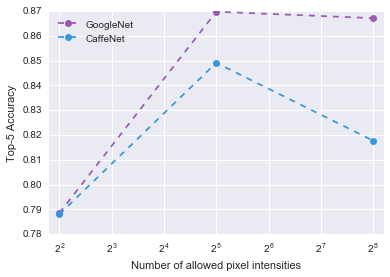

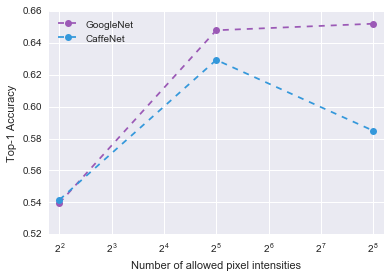

In [48]:
width = 4
height = 3
num_allowed = np.array((4,32,256))
fig, ax = sns.plt.subplots()
sns.plt.plot(num_allowed,accs,'o--',num_allowed,accsa,'o--')
sns.plt.xlabel("Number of allowed pixel intensities")
plt.xlim((3.48,294))
ax.set_xscale('log', basex=2)
sns.plt.ylabel("Top-5 Accuracy")
sns.plt.legend(("GoogleNet","CaffeNet"), loc=2)
sns.plt.legend(loc='upper left')
#plt.legend(["Raw", "GrayScale", "Discretized"])
sns.plt.savefig("top5_acc.eps")
sns.plt.show()

fig2, ax2 = sns.plt.subplots()
sns.plt.plot(num_allowed,accs2,'o--',num_allowed,accsb,'o--')
sns.plt.xlabel("Number of allowed pixel intensities")
plt.xlim((3.48,294))
ax2.set_xscale('log', basex=2)
sns.plt.ylabel("Top-1 Accuracy")
sns.plt.legend(("GoogleNet","CaffeNet"), loc=2)
sns.plt.savefig("top1_acc.eps")
#plt.legend(["Raw", "GrayScale", "Discretized"])
sns.plt.show()

In [43]:
cnet256 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_flickr_style/256log.test")
cnet32 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_flickr_style/32_log.log.test")
cnet4 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_flickr_style/4_log.log.test")
cnetAll = pd.concat([cnet256, cnet32,cnet4], axis=1, join='inner')
cnetAll[:20]
accsa = cnetAll['accuracy_top_5'][9:10].values
accsb = cnetAll['accuracy'][9:10].values
accsa = accsa.reshape(3)[::-1]
accsb =accsb.reshape(3)[::-1]

In [53]:
traingnet256 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_googlenet/256log.train")
traingnet32 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_googlenet/32log.train")
traingnet4 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_googlenet/4log.train")
traingnet256.head

<bound method DataFrame.head of      NumIters      Seconds  LearningRate  loss1/loss1  loss2/loss1  \
0           0    66.265244      0.000100      8.94714      8.89868   
1          20    77.784061      0.000100      6.37457      5.79259   
2          40    89.302609      0.000100      5.88377      5.35615   
3          60   100.817281      0.000100      5.25454      4.85681   
4          80   112.335434      0.000100      5.11867      4.99707   
5         100   123.854887      0.000100      5.02200      5.20729   
6         120   135.371706      0.000100      5.18489      4.80637   
7         140   146.885654      0.000100      4.99239      4.77975   
8         160   158.395702      0.000100      4.85096      5.06337   
9         180   169.912458      0.000100      5.17767      4.87116   
10        200   181.428623      0.000100      4.56106      3.88403   
11        220   192.945628      0.000100      4.24388      4.16265   
12        240   204.471128      0.000100      5.01812     

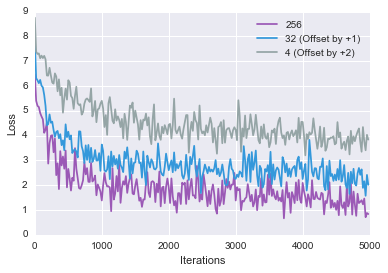

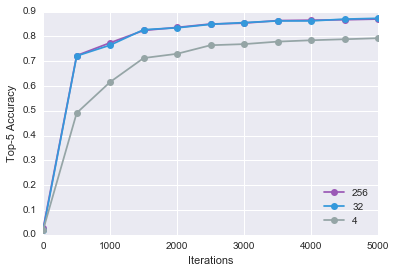

In [42]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.plt.plot(traingnet256['NumIters'],traingnet256['loss3/loss3'],'-',traingnet32['NumIters'],traingnet32['loss3/loss3']+1,'-',traingnet4['NumIters'],traingnet4['loss3/loss3']+2,'-')
sns.plt.xlabel("Iterations")
sns.plt.ylabel("Loss")
plt.legend(["256", "32 (Offset by +1)", "4 (Offset by +2)"])
sns.plt.savefig("googlenet_loss.eps")
sns.plt.show()


sns.set_palette(flatui)
sns.plt.plot(gnet256['NumIters'],gnet256['loss3/top-5'],'-o',gnet32['NumIters'],gnet32['loss3/top-5'],'-o',gnet4['NumIters'],gnet4['loss3/top-5'],'-o')
sns.plt.xlabel("Iterations")
sns.plt.ylabel("Top-5 Accuracy")
plt.legend(["256", "32", "4"],loc=4)
sns.plt.savefig("googlenet_accuracy_evolution.eps")
sns.plt.show()

In [51]:
traincnet256 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_flickr_style/256log.train")
traincnet32 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_flickr_style/32_log.log.train")
traincnet4 = pd.read_csv("/Users/amaharaj/caffe/models/finetune_flickr_style/4_log.log.train")
traincnet256[:5]

,NumIters,Seconds,LearningRate,loss
0,0,23.292722,0.0002,6.16953
1,20,45.947169,0.0002,4.90380
2,40,70.852984,0.0002,4.42421
3,60,96.619041,0.0002,4.04418
4,80,122.564054,0.0002,3.63881


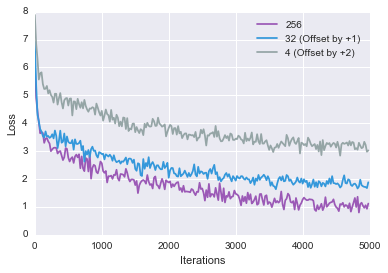

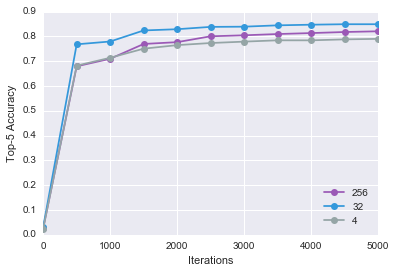

In [54]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.plt.plot(traincnet256['NumIters'],traincnet256['loss'],'-',traincnet32['NumIters'],traincnet32['loss']+1,'-',traincnet4['NumIters'],traincnet4['loss']+2,'-')
sns.plt.xlabel("Iterations")
sns.plt.ylabel("Loss")
plt.legend(["256", "32 (Offset by +1)", "4 (Offset by +2)"])
sns.plt.savefig("caffenet_loss.eps")
sns.plt.show()


sns.set_palette(flatui)
sns.plt.plot(cnet256['NumIters'],cnet256['accuracy_top_5'],'-o',cnet32['NumIters'],cnet32['accuracy_top_5'],'-o',cnet4['NumIters'],cnet4['accuracy_top_5'],'-o')
sns.plt.xlabel("Iterations")
sns.plt.ylabel("Top-5 Accuracy")
plt.legend(["256", "32", "4"],loc=4)
sns.plt.savefig("caffenet_accuracy_evolution.eps")
sns.plt.show()